## This notebook has been uploaded to GitHub
#### https://github.com/silverboris/DataScienceClass/blob/master/FP2_Boris_Serebrinskiy_EDA_Installment2.ipynb



## MS Data Science Class
### Final Project, Part 2, EDA, Installment 2
### Author: Boris Serebrinskiy
### Date: Dec 1, 2018

### Project Name: Predicting cost of solar panel installations based on system size, progress in solar panel development, economic incentives, electric rates.

### Installment 2 - addition of Electric Rates, Construction Costs, Return on Investment

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline



In [167]:
DATA_FILE="electricity_avgprice_annual.csv"

In [168]:
df = pd.read_csv(DATA_FILE)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 8 columns):
Year                      4104 non-null int64
State                     4104 non-null object
IndustrySectorCategory    4104 non-null object
Residential               4104 non-null float64
Commercial                4104 non-null object
Industrial                4104 non-null float64
Transportation            2497 non-null float64
Total                     4104 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 256.6+ KB


In [170]:
df.describe()

,Year,Residential,Industrial,Transportation,Total
count,4104.000000,4104.000000,4104.000000,2497.000000,4104.000000
mean,2004.771199,9.138038,5.871209,4.033136,7.863255
std,7.714093,4.474938,3.170240,4.584986,4.795503
min,1990.000000,-0.480000,-2.090000,0.000000,-1.670000
25%,1999.000000,6.940000,4.160000,0.000000,5.640000
50%,2005.000000,8.680000,5.290000,0.860000,7.170000
75%,2011.000000,11.460000,7.170000,8.140000,9.530000
max,2017.000000,37.340000,30.820000,25.280000,151.190000


In [171]:
df.groupby(by="IndustrySectorCategory").count()

,Year,State,Residential,Commercial,Industrial,Transportation,Total
IndustrySectorCategory,,,,,,,
Delivery-Only Service,368,368,368,368,368,313,368
Energy-Only Providers,411,411,411,411,411,311,411
Full-Service Providers,1456,1456,1456,1456,1456,780,1456
Restructured Retail Service Providers,413,413,413,413,413,313,413
Total Electric Industry,1456,1456,1456,1456,1456,780,1456


### We are going to be focusing on residential rates from Full-Service Providers, so let's filter all other types out

In [172]:
df_electric = df[df["IndustrySectorCategory"] == 'Full-Service Providers']
### dont need to do this - we will use ints in join: 
##df_electric['Year'] = pd.to_datetime(df_electric["Year"],format='%Y')

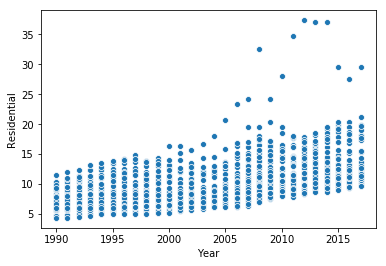

In [173]:
sns.scatterplot(x="Year",y="Residential",data=df_electric)

## There is a clear upward trend in electric rates, with some states being outliers

In [174]:
df_electric.drop(inplace=True,axis=0, columns=["IndustrySectorCategory","Commercial","Industrial","Transportation","Total"])
df_electric.rename(index=str,columns={"Residential":"ResidentialRate"}, inplace=True)

/Users/silverbob/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/silverbob/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [175]:
df_electric.describe()

,Year,ResidentialRate
count,1456.000000,1456.000000
mean,2003.500000,10.004904
std,8.080523,3.595502
min,1990.000000,4.360000
25%,1996.750000,7.557500
50%,2003.500000,9.175000
75%,2010.250000,11.572500
max,2017.000000,37.340000


### Now let's load solar costing dataset and join with electric rates

In [176]:
df_solar = pd.read_csv("solar_clean_data.csv", parse_dates=[0,1])


## Adding Year (integer) column to help with joins to electric rates

In [177]:

df_solar["Year"] = df_solar.date.dt.year

In [178]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 11 columns):
date            9307 non-null datetime64[ns]
date.1          9307 non-null datetime64[ns]
Size            9307 non-null float64
price           9307 non-null float64
CleanPrice      9307 non-null float64
efficiency      9307 non-null float64
CostPerKW       9307 non-null float64
IncentivePct    9307 non-null float64
State           9307 non-null object
zip             9307 non-null int64
Year            9307 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 799.9+ KB


## Joining on Year and State columns

In [179]:
df_solar_and_electric = df_solar.merge(df_electric, left_on=["Year","State"], right_on=["Year","State"])

In [180]:
df_solar_and_electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9307 entries, 0 to 9306
Data columns (total 12 columns):
date               9307 non-null datetime64[ns]
date.1             9307 non-null datetime64[ns]
Size               9307 non-null float64
price              9307 non-null float64
CleanPrice         9307 non-null float64
efficiency         9307 non-null float64
CostPerKW          9307 non-null float64
IncentivePct       9307 non-null float64
State              9307 non-null object
zip                9307 non-null int64
Year               9307 non-null int64
ResidentialRate    9307 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(1)
memory usage: 945.2+ KB


In [181]:
df_solar_and_electric.corr()

,Size,price,CleanPrice,efficiency,CostPerKW,IncentivePct,zip,Year,ResidentialRate
Size,1.000000,0.773327,0.762622,0.136470,-0.330242,0.001065,-0.212860,0.160190,0.086982
price,0.773327,1.000000,0.949333,0.024801,0.211347,0.095390,-0.163077,-0.178509,-0.000283
CleanPrice,0.762622,0.949333,1.000000,0.094956,0.287250,-0.194831,-0.078705,-0.028895,0.076089
efficiency,0.136470,0.024801,0.094956,1.000000,-0.094252,-0.248038,0.082115,0.459134,0.200787
CostPerKW,-0.330242,0.211347,0.287250,-0.094252,1.000000,-0.276740,0.237441,-0.315555,-0.062903
IncentivePct,0.001065,0.095390,-0.194831,-0.248038,-0.276740,1.000000,-0.302446,-0.465654,-0.278386
zip,-0.212860,-0.163077,-0.078705,0.082115,0.237441,-0.302446,1.000000,0.024748,-0.337826
Year,0.160190,-0.178509,-0.028895,0.459134,-0.315555,-0.465654,0.024748,1.000000,0.340588
ResidentialRate,0.086982,-0.000283,0.076089,0.200787,-0.062903,-0.278386,-0.337826,0.340588,1.000000


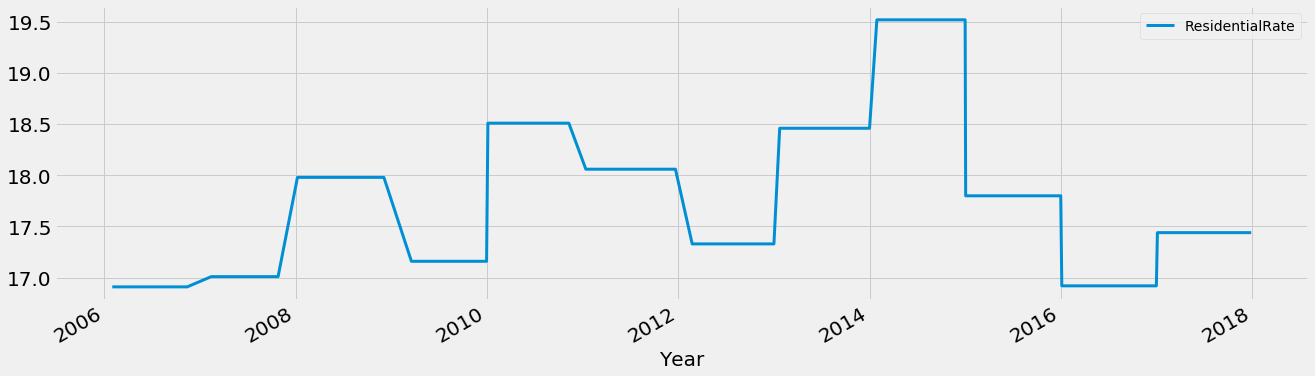

In [307]:
# NY residential rates over the years
df_solar_and_electric[df_solar_and_electric.State=='NY'].plot.line(x="date",y="ResidentialRate", figsize=(20,6), linewidth=3, fontsize=20) 

plt.xlabel('Year', fontsize=20); 

## Load NASA solar radiation rates and explore them

In [183]:
df_nasa = pd.read_csv("nasa_insolation.csv")
df_nasa.set_index('CELL_ID', inplace=True)

In [184]:
df_nasa.describe()

,AREA,PERIMETER,X_COORD,Y_COORD,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,ANNUAL
count,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000
mean,1713.945599,165.756413,-97.728048,38.169244,3.871446,4.531477,5.301022,5.793559,5.789630,6.019506,6.074816,6.003636,5.627538,5.114895,3.880906,3.589060,5.133153
std,162.468339,7.995004,16.358722,6.585848,0.925552,0.807653,0.808201,0.788611,0.740504,0.740382,0.749288,0.792527,0.808616,0.929455,1.063906,0.951491,0.771967
min,1300.485000,144.271000,-125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1585.325000,159.526000,-109.551500,34.008000,3.275000,4.160000,4.890000,5.475000,5.500000,5.700000,5.670000,5.550000,5.260000,4.630000,3.110000,2.980000,4.780000
50%,1714.805000,166.051000,-98.307000,38.401000,3.920000,4.510000,5.280000,5.800000,5.710000,6.020000,6.180000,6.080000,5.590000,5.200000,3.970000,3.660000,5.130000
75%,1845.428000,172.279500,-87.509000,42.917000,4.490000,4.970000,5.670000,6.140000,6.110000,6.420000,6.500000,6.460000,6.135000,5.760000,4.555000,4.200000,5.570000
max,2020.426000,180.232000,0.000000,49.323000,5.930000,6.430000,7.180000,7.350000,7.260000,7.140000,7.250000,7.340000,7.080000,6.670000,6.060000,5.560000,6.600000


In [185]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4923 entries, 233346 to 251417
Data columns (total 17 columns):
AREA         4923 non-null float64
PERIMETER    4923 non-null float64
X_COORD      4923 non-null float64
Y_COORD      4923 non-null float64
JANUARY      4923 non-null float64
FEBRUARY     4923 non-null float64
MARCH        4923 non-null float64
APRIL        4923 non-null float64
MAY          4923 non-null float64
JUNE         4923 non-null float64
JULY         4923 non-null float64
AUGUST       4923 non-null float64
SEPTEMBER    4923 non-null float64
OCTOBER      4923 non-null float64
NOVEMBER     4923 non-null float64
DECEMBER     4923 non-null float64
ANNUAL       4923 non-null float64
dtypes: float64(17)
memory usage: 692.3 KB


## NASA data has no zip or state, we will need to enrich it. Here is a little test using Bing Map API for my house in Brooklyn using GPS coordinates

In [186]:
import requests
import json

def get_zip_state_by_gps_coord(latitude, longitude):
    response = requests.get("http://dev.virtualearth.net/REST/v1/Locations/ " + str(latitude) + "," + str(longitude) +"?o=json&key=AmIRhNMzTSnkHgcyEbKzgOYPeHT9G4r1I4ruInftcdWcnPhPeJiJ4y79MZ5IaVfX")
    data=response.json()
    try:
        state = data['resourceSets'][0]['resources'][0]['address']['adminDistrict']
    except:
        state = '--'
    
    try:
        zip = data['resourceSets'][0]['resources'][0]['address']['postalCode']
    except:
        zip = '00000'
        
    return ( {'state' : state, 'zip' : zip })



location = get_zip_state_by_gps_coord(40.661000,-73.963000 )
                                                                                    
print ('state: ' + location['state']) 
print('zip: ' +  location['zip']) 

location = get_zip_state_by_gps_coord(40.162,-74.806)
                                                                                    
print ('state: ' + location['state']) 
print('zip: ' +  location['zip']) 

state: NY
zip: 11215
state: PA
zip: 00000


## CAREFUL HERE - LONG RUNNING STEP

In [ ]:
REDO_ZIP_STATE_FOR_SOLAR = False

In [187]:
# this step takes 15 minutes to run 
if REDO_ZIP_STATE_FOR_SOLAR:
    df_nasa["Zip"] = df_nasa.apply(lambda row: get_zip_state_by_gps_coord(row['Y_COORD'], row['X_COORD'])['zip'] , axis=1)



In [191]:
if REDO_ZIP_STATE_FOR_SOLAR:
    df_nasa["State"] = df_nasa.apply(lambda row: get_zip_state_by_gps_coord(row['Y_COORD'], row['X_COORD'])['state'] , axis=1)



In [192]:
## check South Jersey if the enrichment worked, Zip and State should be populated

df_nasa[ (df_nasa["X_COORD"] < -74) & (df_nasa["X_COORD"] > -75) & (df_nasa["Y_COORD"] < 41) & (df_nasa["Y_COORD"] > 40)].head()

,AREA,PERIMETER,X_COORD,Y_COORD,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,ANNUAL,Zip,State
CELL_ID,,,,,,,,,,,,,,,,,,,
267370,1786.176,169.360,-74.715,40.917,3.21,3.99,5.19,5.30,5.57,5.71,5.60,5.58,5.26,4.67,3.45,2.98,4.71,07874,NJ
268370,1785.224,169.317,-74.214,40.880,3.26,3.96,5.20,5.17,5.47,5.62,5.47,5.42,5.14,4.53,3.33,3.02,4.63,07424,NJ
267371,1775.259,168.839,-74.760,40.539,3.35,4.07,5.23,5.35,5.64,5.78,5.67,5.59,5.24,4.66,3.53,3.12,4.77,08853,NJ
268371,1774.236,168.792,-74.265,40.503,3.15,3.90,5.06,5.03,5.34,5.46,5.30,5.23,4.94,4.41,3.23,2.87,4.49,08861,NJ
267372,1764.352,168.316,-74.806,40.162,3.21,3.85,5.04,5.08,5.35,5.50,5.33,5.23,4.95,4.38,3.38,2.97,4.52,00000,PA


In [193]:
df_nasa.to_csv("nasa_insolation_with_zip_state.csv")

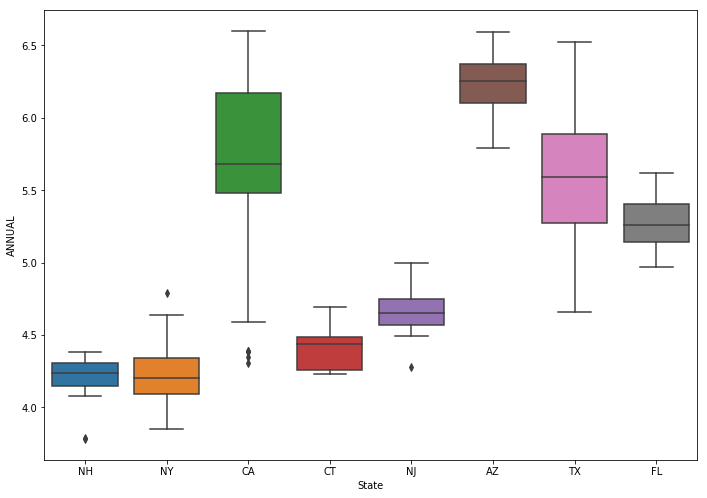

In [194]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.boxplot(data=df_nasa[df_nasa["State"].isin(['CA','NY','NJ','CT','TX','AZ','FL','NH'])], y="ANNUAL", x="State")

## Find mean annual sun exposure per state and save it into a new datafram

In [195]:
df_sun_by_state = pd.DataFrame(df_nasa.groupby('State')['ANNUAL'].mean())
df_sun_by_state.index.set_names("State")
df_sun_by_state.rename(index=str,columns={'ANNUAL': "SolarRadiation"}, inplace=True)
df_sun_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, -- to WY
Data columns (total 1 columns):
SolarRadiation    64 non-null float64
dtypes: float64(1)
memory usage: 1.0+ KB


## Joining Solar Cost/Electric Data with NASA insolatiomn on State columns

In [196]:
df_solar_electric_nasa_merged = df_solar_and_electric.merge(df_sun_by_state, left_on=["State"], right_on=["State"])

In [197]:
df_solar_electric_nasa_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9307 entries, 0 to 9306
Data columns (total 13 columns):
date               9307 non-null datetime64[ns]
date.1             9307 non-null datetime64[ns]
Size               9307 non-null float64
price              9307 non-null float64
CleanPrice         9307 non-null float64
efficiency         9307 non-null float64
CostPerKW          9307 non-null float64
IncentivePct       9307 non-null float64
State              9307 non-null object
zip                9307 non-null int64
Year               9307 non-null int64
ResidentialRate    9307 non-null float64
SolarRadiation     9307 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 1018.0+ KB


## Adding construction costs from https://www.census.gov/construction/cpi/

In [255]:
df_construction = pd.read_csv("construction_costs_monthly.csv")
df_construction.Date = pd.to_datetime(df_construction.Date)
df_construction = df_construction.set_index(df_construction.Date)

In [256]:
df_construction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2000-01-01 to 2018-10-01
Data columns (total 2 columns):
Date                      226 non-null datetime64[ns]
ConstructionPriceIndex    226 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [257]:
df_construction.describe()

,ConstructionPriceIndex
count,226.000000
mean,101.178761
std,14.327090
min,74.700000
25%,94.650000
50%,100.750000
75%,109.425000
max,131.200000


In [258]:
df_construction.tail()

,Date,ConstructionPriceIndex
Date,,
2018-06-01,2018-06-01,130.7
2018-07-01,2018-07-01,130.2
2018-08-01,2018-08-01,130.0
2018-09-01,2018-09-01,130.4
2018-10-01,2018-10-01,131.2


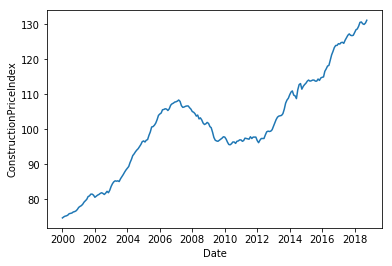

In [259]:
sns.lineplot(data=df_construction, y="ConstructionPriceIndex", x="Date")

## Joining Solar Cost/Electric/NASA insolation and Construction costs on Date

In [270]:
df_solar_electric_nasa_merged.set_index(df_solar_electric_nasa_merged.date, inplace=True)

df_solar_electric_nasa_merged['Month'] = df_solar_electric_nasa_merged.index.month

df_construction['Month'] =df_construction.index.month
df_construction['Year'] =df_construction.index.year

In [271]:
df_final_merged = df_solar_electric_nasa_merged.merge(df_construction, left_on=["Month",'Year'], right_on=["Month",'Year'] )

In [272]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9307 entries, 0 to 9306
Data columns (total 16 columns):
date                      9307 non-null datetime64[ns]
date.1                    9307 non-null datetime64[ns]
Size                      9307 non-null float64
price                     9307 non-null float64
CleanPrice                9307 non-null float64
efficiency                9307 non-null float64
CostPerKW                 9307 non-null float64
IncentivePct              9307 non-null float64
State                     9307 non-null object
zip                       9307 non-null int64
Year                      9307 non-null int64
ResidentialRate           9307 non-null float64
SolarRadiation            9307 non-null float64
Month                     9307 non-null int64
Date                      9307 non-null datetime64[ns]
ConstructionPriceIndex    9307 non-null float64
dtypes: datetime64[ns](3), float64(9), int64(3), object(1)
memory usage: 1.2+ MB


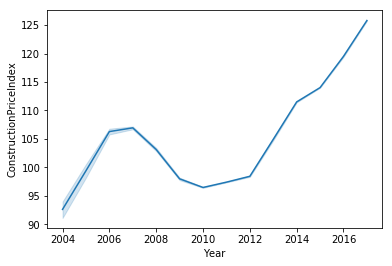

In [275]:
sns.lineplot(data=df_final_merged, x="Year", y="ConstructionPriceIndex")

In [279]:
# drop duplicate columns 
df_final_merged.drop(columns=["date","date.1"], inplace=True)

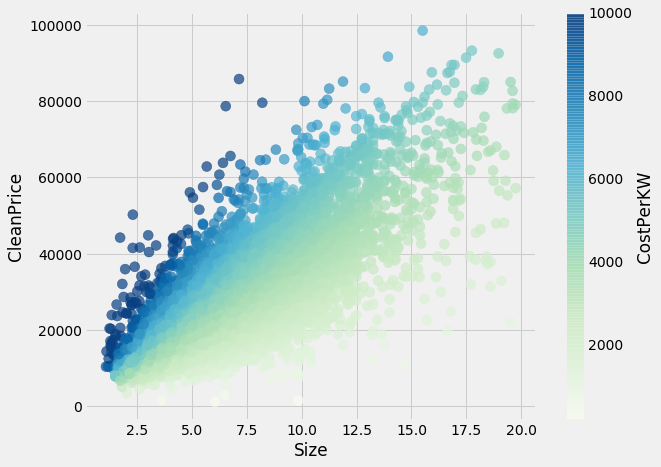

In [315]:
plt.style.use("fivethirtyeight")
df_final_merged.plot(kind="scatter", \
                     x="Size", y="CleanPrice", c="CostPerKW", \
                     cmap="GnBu", s = 100, alpha = .7,  figsize=(9, 7));

# Lighter green color in the chart above shows least expensive per KW systems.

## Adding new column: ROIYears - # of years before costs are recouped

In [317]:
# Price / (size of the system *  SolarRadiation * residential electric rate / 100) / 365

df_final_merged["ROIYears"] = \
    df_final_merged.apply(lambda row :  float(row.CleanPrice) / ( float(row.Size * row.SolarRadiation * row.ResidentialRate) / 100. * 365.), axis=1)



In [320]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9307 entries, 0 to 9306
Data columns (total 15 columns):
Size                      9307 non-null float64
price                     9307 non-null float64
CleanPrice                9307 non-null float64
efficiency                9307 non-null float64
CostPerKW                 9307 non-null float64
IncentivePct              9307 non-null float64
State                     9307 non-null object
zip                       9307 non-null int64
Year                      9307 non-null int64
ResidentialRate           9307 non-null float64
SolarRadiation            9307 non-null float64
Month                     9307 non-null int64
Date                      9307 non-null datetime64[ns]
ConstructionPriceIndex    9307 non-null float64
ROIYears                  9307 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 1.1+ MB


## Finally, save the resulting dataframe to disk so we can pick it up in FP3 part of the project

In [318]:
df_final_merged.to_csv("solar_electric_construction_nasa_final.csv")